In [ ]:
# Integrating Goodle Colab with Drive
from google.colab import drive
drive.mount('/content/drive')

# Getting to the Desired Directory
%cd "drive/My Drive/Colab Notebooks/Project/Checkpoint3"
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1lFTpgNpg9y3aGABPDNbbG78Biwc6ZPog/Project/Checkpoint3
comment.png  Dataset  Wakhri_Science_Project.ipynb


In [58]:
# Importing Required libraries
import csv
import re
import string
import pandas as pd
from scipy.spatial import distance
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import json
from sklearn import metrics
import glob
import os
import nltk
from nltk.corpus import stopwords
import os
from wordcloud import WordCloud
from PIL import Image

In [59]:
# Downloading NLTK's (Natural Language Toolkit) stopwords collection
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [60]:
# Reading the dataset
dataset = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1') # <<<=== what is this 'enconding = latin-1'

In [61]:
# Removing empty fields
del dataset['Unnamed: 2']
del dataset['Unnamed: 3']
del dataset['Unnamed: 4']

In [62]:
# Renaming columns for our understanding
# dataset.rename(columns={"v1":"class", "v2":"content"},inplace=True)

In [63]:
# Removing Stop Words
stopwords = set(stopwords.words('english'))

for i in range (len(dataset['v2'])):
    dataset['v2'][i] = (' '.join([word for word in dataset['v2'][i].split() if word not in stopwords]))
    dataset['v2'][i] = re.sub("[0-9]", "", dataset['v2'][i])

In [64]:
# Removing punctuation
dataset_with_punctuation = dataset.copy()
dataset['v2'] = dataset['v2'].str.replace('[^\w\s]','')
dataset['v2'] = dataset['v2'].str.lower() 

#dataset['v2'] = dataset['v2'].str.replace(/[^A-Za-z']/g, "")

In [65]:
# Doing EDA (Exploratory Data Analysis)
# We will take a look at the Dataset from different perspective
# Below are some simple attributesof the Dataset
print("Dataset ...\n",dataset,"\n\n\ndataset.info() ...\n")
print(dataset.info(),"\n\n\ndataset.describe() ...\n")
print(dataset.describe(),"\n\n\ndataset.value_counts() ...\n")
print(dataset.v1.value_counts(),"\n\n\ndataset.groupby('v1').describe() ...\n")
print(dataset.groupby('v1').describe())

Dataset ...
         v1                                                 v2
0      ham  go jurong point crazy available bugis n great ...
1      ham                            ok lar joking wif u oni
2     spam  free entry  wkly comp win fa cup final tkts st...
3      ham                u dun say early hor u c already say
4      ham           nah i think goes usf lives around though
...    ...                                                ...
5567  spam  this nd time tried  contact u u å pound prize ...
5568   ham                  will ì_ b going esplanade fr home
5569   ham                  pity  mood that soany suggestions
5570   ham  the guy bitching i acted like id interested bu...
5571   ham                                 rofl its true name

[5572 rows x 2 columns] 


dataset.info() ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572

In [66]:
# We'll start with an interesting visualization
# We want to visualize the most used words in spam and ham messages

In [67]:
# Lets start with most used words in spam messages
# # only_spam = dataset_with_punctuation[(dataset_with_punctuation["v1"] == "spam") ]
# # print(only_spam.head(10))
# spam_list = dataset[(dataset["v1"] == "spam") ]['v2'].tolist()
# print(spam_list)
# # content_mask = np.array(Image.open("comment.png"))
# # Creating a Word Cloud Image
# wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(spam_list)

In [68]:
# Lets get the information about the lengths of each email calss
# We will add length property to the dataset
dataset['length'] = dataset['v2'].apply(len)
print(dataset.head())

     v1                                                 v2  length
0   ham  go jurong point crazy available bugis n great ...      82
1   ham                            ok lar joking wif u oni      23
2  spam  free entry  wkly comp win fa cup final tkts st...     110
3   ham                u dun say early hor u c already say      35
4   ham           nah i think goes usf lives around though      40


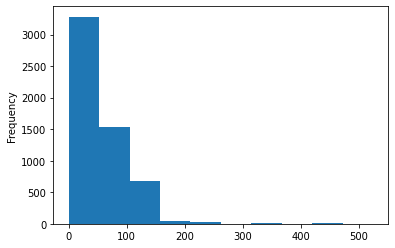

In [69]:
# Lets plot look at the length property as a graph
dataset['length'].plot(bins=10, kind='hist') 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13960e6be0>,
      dtype=object)

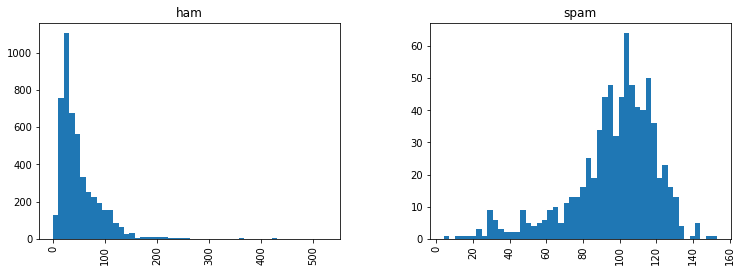

In [70]:
# As the length property looks normally distributed, lets look deeply into this <=== normally disributed kesey hey ye ?
# We'll check if the length has any relation with the message category
dataset.hist(column='length', by='v1', bins=50,figsize=(12,4))

In [71]:
# This is amazing, we can see a direct relation between length and message category.

In [72]:
# Lets look at the mean lengths of the ham and spam sms
ham_mean = dataset[dataset["v1"] == "ham"]["length"].mean()
spam_mean = dataset[dataset["v1"] == "spam"]["length"].mean()

print("mean length of ham messages ... ",ham_mean)
print("mean length of spam messages ... ",spam_mean)

mean length of ham messages ...  49.92331606217616
mean length of spam messages ...  97.07496653279786


In [73]:
# Clearly, the spam messages have a longer length as compared to the ham messages

In [74]:
# Lets find some other property of the dataset related to the sms being ham or spam
# We feel that exclamation marks are quite common in spam messages.
# Lets see if there's a relation between number of exclamation marks and sms being spam or ham
# For that purpose, we have to calculate the number of exclamation marks in a sms

In [75]:
# Finding number of exclamation marks in each sms (for this purpose, we'll use the dataset with punctuation)
exclamation_marks_count = []
for sms in dataset_with_punctuation['v2']:
  count = 0
  for letter in sms:
    if letter == "!":
      count += 1
  exclamation_marks_count.append(count)
  
# We'll add the varible em_count into our dataset to process further
dataset_with_punctuation["em_count"] = exclamation_marks_count
print(dataset_with_punctuation.head(10))

     v1                                                 v2  em_count
0   ham  Go jurong point, crazy.. Available bugis n gre...         0
1   ham                      Ok lar... Joking wif u oni...         0
2  spam  Free entry  wkly comp win FA Cup final tkts st...         0
3   ham          U dun say early hor... U c already say...         0
4   ham          Nah I think goes usf, lives around though         0
5  spam  FreeMsg Hey darling  week's word back! I'd lik...         2
6   ham  Even brother like speak me. They treat like ai...         0
7   ham  As per request 'Melle Melle (Oru Minnaminungin...         0
8  spam  WINNER!! As valued network customer selected r...         3
9  spam  Had mobile  months more? U R entitled Update l...         1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f138999d390>,
      dtype=object)

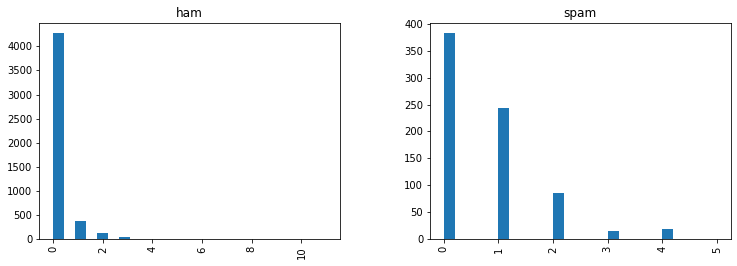

In [76]:
# Lets look at the distribution of ! count in both sms categories
dataset_with_punctuation.hist(column='em_count', by='v1', bins=25,figsize=(12,4))

In [77]:
# We can see that the graph of spam is more to the right than ham. So, there is some relation of ! with spam.
# Lets explore more with some numbers

In [78]:
# We can look at the mean count of exclaimation marks in the ham and spam sms
ham_mean = dataset_with_punctuation[dataset_with_punctuation["v1"] == "ham"]["em_count"].mean()
spam_mean = dataset_with_punctuation[dataset_with_punctuation["v1"] == "spam"]["em_count"].mean()


# We can look at the Percentage of sms containing ! in each category
ham_emcount = dataset_with_punctuation[(dataset_with_punctuation["v1"] == "ham") & (dataset_with_punctuation["em_count"] != 0)]["em_count"].size
spam_emcount = dataset_with_punctuation[(dataset_with_punctuation["v1"] == "spam") & (dataset_with_punctuation["em_count"] != 0)]["em_count"].size
ham_count = dataset_with_punctuation[(dataset_with_punctuation["v1"] == "ham") ].size
spam_count = dataset_with_punctuation[(dataset_with_punctuation["v1"] == "spam") ].size


print("mean count of ! in ham messages ... ",ham_mean)
print("mean count of ! in spam messages ... ",spam_mean)
# print("number of ham messages with ! ... ",ham_emcount)
# print("number of spam messages with ! ... ",spam_emcount)
# print("number of ham messages ... ",ham_count)
# print("number of spam messages ... ",spam_count)
print("Percentage of ham sms containing ! ... ", (ham_emcount/ham_count)*100)
print("Percentage of spam sms containing ! ... ",(spam_emcount/ spam_count)*100)

# The mean count of ! in spam messages is 4 times greater than mean count of ! in ham messages
# Moreover, the Percentage of spam sms containing ! is 4 times greater than Percentage of ham sms containg !
# So, we can say that a message containing ! is 4x more probable to be a spam than a message without !


mean count of ! in ham messages ...  0.1738860103626943
mean count of ! in spam messages ...  0.7255689424364123
Percentage of ham sms containing ! ...  3.861830742659758
Percentage of spam sms containing ! ...  16.28737170905846


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(dataset["v2"])


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dataset["v1"], test_size = 0.20, random_state = 0)
print("X_train shape: {}\n X_test shape: {}\nY_train shape: {}\nY_test shape: {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape: (4457, 8578)
 X_test shape: (1115, 8578)
Y_train shape: (4457,)
Y_test shape: (1115,)


In [102]:
acc_arr=[]
# Now, we will train and test different ML algorithms to get the most accurate one

In [82]:
# We'll start with Naive Bayes

In [103]:
#Using Naive Bayes Multinomial to predict class.
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB


# Create a Multinomial Naive Bayes model and fit on our training data
model = MultinomialNB().fit(X_train, y_train)
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
classification_rep=classification_report(y_test,pred)

print('Classification Report: ','\n\n',classification_rep)
print("Accuracy of Naive Bayes Classifier is: ",accuracy)
acc_arr.append(accuracy)

Classification Report:  

               precision    recall  f1-score   support

         ham       0.99      0.98      0.98       949
        spam       0.88      0.94      0.91       166

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy of Naive Bayes Classifier is:  0.9713004484304932


In [84]:
# Lets check the Accuracy of other Algorithms
# The method is same for other algorithms as well.
# We'll import necessary libraries, fit the model on the training data, test it and check the accuracy.

# Lets go with LOGISTIC ReGRESSION

In [104]:
# Using Logistic regression to predict class.
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
classification_rep=classification_report(y_test,pred)
print('Classification Report: ','\n\n',classification_rep)
print("Accuracy of Logistic Regression classifier is: ",accuracy)
acc_arr.append(accuracy)

Classification Report:  

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       0.99      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of Logistic Regression classifier is:  0.97847533632287


In [86]:
# Lets try Support Vector Machine (SVM)

In [105]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
model=clf.fit(X_train, y_train) 
pred = model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
classification_rep=classification_report(y_test,pred)
print('Classification Report: ','\n\n',classification_rep)
print("Accuracy of Support vector machine is: ",accuracy)
acc_arr.append(accuracy)

Classification Report:  

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       0.99      0.88      0.93       166

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of Support vector machine is:  0.9811659192825112


In [88]:
# Random Forest Classifier is also a good ML algorithm

In [106]:
# Using Random Forest classifier to predict classes.
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=50)
model=Random_forest.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
classification_rep=classification_report(y_test,pred)
print('Classification Report: ','\n\n',classification_rep)
print("Accuracy of Random Forest Classifier is: ",accuracy)
acc_arr.append(accuracy)

Classification Report:  

               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       1.00      0.79      0.88       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy of Random Forest Classifier is:  0.968609865470852


In [107]:
# Using Decision Trees to predict class
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
classification_rep=classification_report(y_test,pred)
print('Classification Report: ','\n\n',classification_rep)
print("Accuracy of Decision Tree Classifier is: ",accuracy)
acc_arr.append(accuracy)

Classification Report:  

               precision    recall  f1-score   support

         ham       0.97      0.99      0.98       949
        spam       0.93      0.82      0.87       166

    accuracy                           0.96      1115
   macro avg       0.95      0.90      0.92      1115
weighted avg       0.96      0.96      0.96      1115

Accuracy of Decision Tree Classifier is:  0.9632286995515695


In [ ]:
# Lets check last algorithm to decide the most accurate one: KNN

In [108]:
# Using K-nearest neighbors classifier, using k values from 1 to 9
from sklearn.neighbors import KNeighborsClassifier
k_values=[1,3,5,7,9]
knn_acc=[]
for i in k_values:
    knn=KNeighborsClassifier(n_neighbors = i)
    model=knn.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print("Accuracy of KNN Classifier with k value %s: " %i,accuracy)
    knn_acc.append(accuracy)
mx=max(knn_acc)
acc_arr.append(mx)

Accuracy of KNN Classifier with k value 1:  0.9497757847533632
Accuracy of KNN Classifier with k value 3:  0.9273542600896861
Accuracy of KNN Classifier with k value 5:  0.9121076233183857
Accuracy of KNN Classifier with k value 7:  0.9022421524663677
Accuracy of KNN Classifier with k value 9:  0.895067264573991


Text(0, 0.5, 'Accuracy')

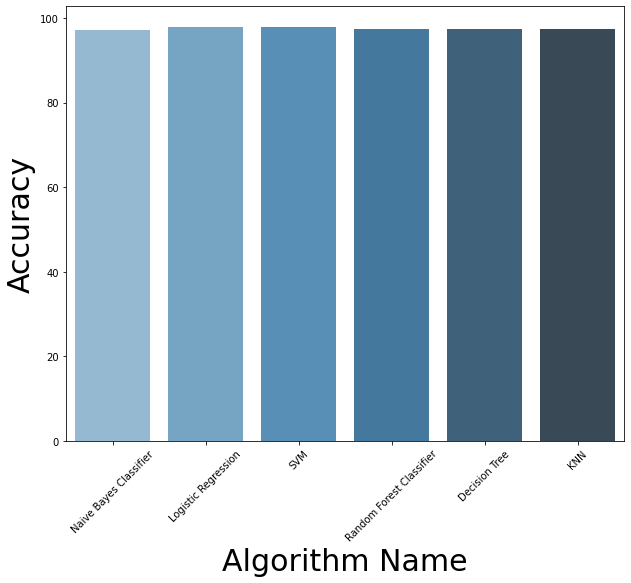

In [110]:
# So, We tried Naive Bayes, Logistic Regression, SVM, Random Forest, KNN and the most accurate one appears to be :Logistic Regression
import seaborn as sns
algo_name=['Naive Bayes Classifier','Logistic Regression','SVM','Random Forest Classifier','Decision Tree','KNN']
acc=np.array(acc)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="Blues_d")
plt.xlabel('Algorithm Name',size=30)
plt.xticks(rotation=45)
plt.ylabel('Accuracy',size=30)